In [0]:
from sklearn.datasets import load_iris
import numpy as np
from sklearn import tree

In [24]:
iris = load_iris()
test_idx = [0,50,100]

# training data
train_target = np.delete(iris.target,test_idx)
train_data = np.delete(iris.data,test_idx, axis=0)

#testing data
test_target = iris.target[test_idx]
test_data = iris.data[test_idx]

clf = tree.DecisionTreeClassifier()
clf.fit(train_data, train_target)
print(test_target)
print(clf.predict(test_data))

print(test_data[0],test_target[0])
print(iris.feature_names, iris.target_names)

[0 1 2]
[0 1 2]
[5.1 3.5 1.4 0.2] 0
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] ['setosa' 'versicolor' 'virginica']


(array([[  0.,   2.,  14.,  66.,  90., 134., 101.,  60.,  27.,   6.],
        [ 10.,  39.,  82., 187., 195., 234., 140.,  78.,  28.,   7.]]),
 array([12.9341104 , 15.58644361, 18.23877682, 20.89111002, 23.54344323,
        26.19577644, 28.84810965, 31.50044286, 34.15277607, 36.80510927,
        39.45744248]),
 <a list of 2 Lists of Patches objects>)

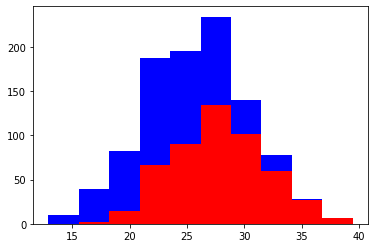

In [26]:
import matplotlib.pyplot as plt
greyhounds = 500
labs = 500

grey_height = 28 + 4* np.random.randn(greyhounds)
lab_height = 24 + 4 * np.random.randn(labs)

plt.hist([grey_height,lab_height], stacked = True, color = ['r', 'b'])

In [42]:
from scipy.spatial import distance

def euc(a,b):
  return distance.euclidean(a,b)

class ScrappyKNN():
  def fit(self, X_train, y_train):
    self.X_train = X_train
    self.y_train = y_train

  
  def predict(self, X_test):
    predictions = []
    for row in X_test:
      label = self.closest(row)
      predictions.append(label)
    return predictions
  
  def closest(self, row):
    best_dist = euc(row, self.X_train[0])
    best_index = 0
    for i in range(1, len(self.X_train)):
      dist = euc(row, self.X_train[i])
      if dist < best_dist:
        best_dist = dist
        best_index = i
    return self.y_train[best_index]

from sklearn import datasets
iris = datasets.load_iris()

X = iris.data
y = iris.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .5)

#from sklearn.neighbors import KNeighborsClassifier
my_cls = ScrappyKNN()
my_cls.fit(X_train, y_train)

predict = my_cls.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predict))

0.96
